In [3]:
#Generating data for two class classification - SVM
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
#from sklearn.datasets import make_blobs
#from sklearn.datasets import make_gaussian_quantiles
import cvxopt
from cvxopt import solvers,matrix
from sklearn import preprocessing
import numpy as np
%matplotlib inline

In [4]:
def accuracy(y_actual,y_pred):
    tot = 0
    for i in range(len(y_pred)):
        if y_pred[i] == y_actual[i]:
            tot += 1
        
    return(1.*tot/len(y_pred))

In [5]:
def svm(typ,rand_state,c=999): ##Default value for hard margins, c = 999.
    plt.figure(figsize=(8, 8))
    plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95)
    plt.subplot(322)
    #X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1,random_state = 1025)
    X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1,random_state =rand_state)
    plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1)
    plt.show()
    Y1[Y1 == 0] = -1
    #scaler = preprocessing.StandardScaler()
    X1 = preprocessing.normalize(X1) #Normalizing the values
    y = Y1.reshape(len(Y1),1)
    y_t = np.transpose(y)
    yyt = np.outer(y,y_t)
    X_t = np.transpose(X1)
    XXt = np.dot(X1,X_t)
    P = yyt * XXt
    q = np.full((len(Y1),1),-1)
    G_ = np.zeros((len(Y1),len(Y1)))
    G1 = G_.copy()
    G2 = G_.copy()
    np.fill_diagonal(G1,-1)
    np.fill_diagonal(G2,1)
    G = np.concatenate((G1,G2))
    h1 = np.zeros((len(Y1),1))
    h2 = np.full((len(Y1),1),c) #Hard Margin
    h = np.concatenate((h1,h2))
    b = np.full((1,1),0.0)
    A = y_t
    A = A.astype(float)
    soln = solvers.qp(matrix(P,tc = 'd'),matrix(q,tc = 'd'),matrix(G,tc = 'd'),matrix(h,tc = 'd'),matrix(A,tc = 'd'),matrix(b))
    lagra_multi = np.ravel(soln['x'])
    #lagra_multi
    #Calculating W
    W = (lagra_multi*Y1).reshape(len(Y1),1)*X1
    W_fin = np.sum(W,axis=0)
    #Calculate the Support vectors.
    eps = 0.01
    #Finding indexes of the Support vectors
    idx=np.where(lagra_multi >= eps)
    #Calculating W0
    supp_vec = X1[idx]
    supp_vec_y = Y1[idx]
    W0 = (-np.sum(supp_vec*W_fin) + np.sum(supp_vec_y))/len(supp_vec)
    #lagra_multi[idx]
    #Creating W0 vector for classification
    Wo = np.full((len(Y1),1),W0)
    summ = np.sum(W_fin*X1,axis = 1).reshape(len(Y1),1)
    line = []
    for i in range(len(Y1)):
        line.append(np.sign(summ[i] + W0).tolist()[0])
    if typ == 'hard':
        print "Accuracy for the Hard margins case is %d" %(accuracy(line,Y1)*100)
    else:
        print "Accuracy for the Soft margins case is %d" %(accuracy(line,Y1)*100)
    X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1,random_state =rand_state)
    #Plotting Support vectors.
    plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1)
    plt.scatter(supp_vec[:, 0], supp_vec[:, 1], marker = '3')
    plt.show()

/root/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


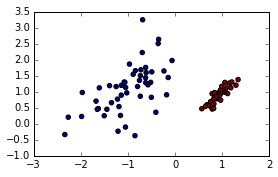

     pcost       dcost       gap    pres   dres
 0:  1.1908e+06 -1.7115e+07  3e+07  2e-01  3e-13
 1:  8.6173e+05 -2.0706e+06  4e+06  1e-02  3e-12
 2:  1.8070e+05 -2.0245e+05  4e+05  7e-06  4e-13
 3:  2.5893e+04 -2.9516e+04  6e+04  3e-14  2e-13
 4:  3.6628e+03 -4.2255e+03  8e+03  2e-14  7e-14
 5:  5.0456e+02 -6.2410e+02  1e+03  1e-14  3e-14
 6:  6.3799e+01 -9.7467e+01  2e+02  4e-15  1e-14
 7:  5.1039e+00 -1.7578e+01  2e+01  9e-16  4e-15
 8: -1.3851e+00 -6.0206e+00  5e+00  2e-16  2e-15
 9: -2.7072e+00 -4.5811e+00  2e+00  7e-16  9e-16
10: -2.9142e+00 -4.7370e+00  2e+00  2e-16  9e-16
11: -3.9383e+00 -4.3383e+00  4e-01  2e-16  9e-16
12: -4.0530e+00 -4.0591e+00  6e-03  5e-16  1e-15
13: -4.0553e+00 -4.0554e+00  6e-05  1e-15  1e-15
14: -4.0553e+00 -4.0553e+00  6e-07  3e-15  1e-15
Optimal solution found.
Accuracy for the Hard margins case is 100


/root/anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:294: FutureWarning: in the future, full((100, 1), -1) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)
/root/anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:294: FutureWarning: in the future, full((100, 1), 999) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


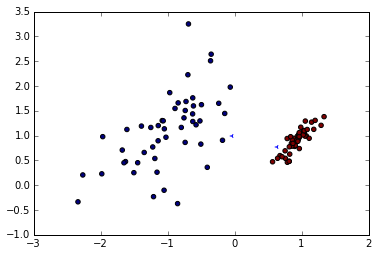

In [6]:
##Calling svm function for hard margins case. Separable dataset.
svm(typ='hard',rand_state=1,c=999)

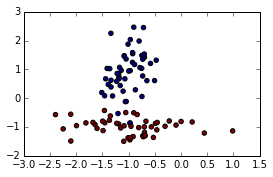

     pcost       dcost       gap    pres   dres
 0:  7.7373e+19 -2.4731e+21  4e+21  2e-01  5e-06
 1:  7.5480e+19 -3.6073e+20  6e+20  2e-02  9e+02
 2:  1.3648e+19 -6.1005e+19  8e+19  8e-04  4e+01
 3:  1.7070e+18 -1.5501e+19  2e+19  1e-04  5e+00
 4:  1.1896e+17 -6.4882e+18  7e+18  1e-06  2e-06
 5:  1.4813e+14 -1.5705e+17  2e+17  3e-06  2e-06
 6: -3.2408e+10 -1.5739e+15  2e+15  4e-06  2e-06
 7: -4.7362e+10 -1.5893e+13  2e+13  5e-06  3e-06
 8: -4.7427e+10 -3.1335e+11  3e+11  5e-06  2e-06
 9: -5.0600e+10 -1.5515e+11  1e+11  5e-06  2e-06
10: -5.9173e+10 -1.5999e+11  1e+11  7e-06  3e-06
11: -6.4471e+10 -1.4795e+11  8e+10  9e-07  3e-06
12: -6.9581e+10 -1.4740e+11  8e+10  5e-06  3e-06
13: -6.3408e+10 -1.2529e+11  6e+10  2e-06  3e-06
14: -7.2864e+10 -9.8582e+10  3e+10  4e-06  4e-06
15: -7.5079e+10 -9.7960e+10  2e+10  6e-06  4e-06
16: -8.0597e+10 -8.9677e+10  9e+09  7e-06  5e-06
17: -8.0416e+10 -8.7097e+10  7e+09  9e-06  4e-06
18: -8.0620e+10 -8.6889e+10  6e+09  1e-05  4e-06
19: -8.2178e+10 -8.48

/root/anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:294: FutureWarning: in the future, full((100, 1), 9999999999) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


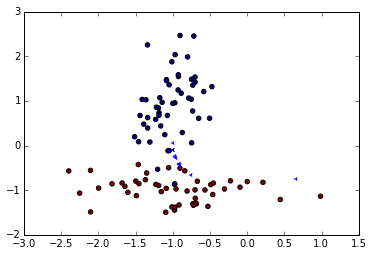

In [15]:
#Hard margin non separable dataset
svm(typ='hard',rand_state=1025,c=9999999999)

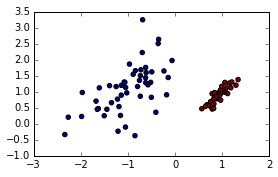

     pcost       dcost       gap    pres   dres
 0: -4.0403e+00 -1.3645e+02  6e+02  2e+00  5e-16
 1: -8.9849e-01 -5.7763e+01  7e+01  9e-02  6e-16
 2: -1.6762e+00 -8.3047e+00  7e+00  6e-03  2e-15
 3: -2.5337e+00 -4.4982e+00  2e+00  1e-03  5e-16
 4: -2.7380e+00 -4.4652e+00  2e+00  1e-03  6e-16
 5: -3.0168e+00 -3.9357e+00  9e-01  1e-04  6e-16
 6: -3.2533e+00 -3.5864e+00  3e-01  3e-05  6e-16
 7: -3.3672e+00 -3.4285e+00  6e-02  3e-06  5e-16
 8: -3.3928e+00 -3.3960e+00  3e-03  7e-16  6e-16
 9: -3.3943e+00 -3.3945e+00  2e-04  3e-16  6e-16
10: -3.3944e+00 -3.3944e+00  2e-06  3e-16  7e-16
Optimal solution found.
Accuracy for the Soft margins case is 100


/root/anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:294: FutureWarning: in the future, full((100, 1), 1) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


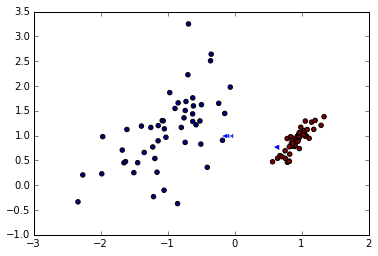

In [8]:
#Soft Margin Separable dataset
svm(typ='soft',rand_state=1,c=1)

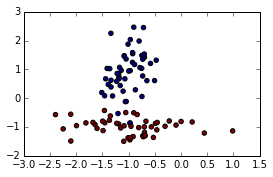

     pcost       dcost       gap    pres   dres
 0:  7.7373e+25 -2.4731e+27  4e+27  2e-01  5e-03
 1:  7.5480e+25 -3.6072e+26  6e+26  2e-02  2e+09
 2:  1.3648e+25 -6.1005e+25  8e+25  2e-03  8e+07
 3:  1.7071e+24 -1.5501e+25  2e+25  9e-03  1e+07
 4:  1.1896e+23 -6.4883e+24  7e+24  2e-03  3e-03
 5:  1.4818e+20 -1.5705e+23  2e+23  1e-03  2e-03
 6:  1.4907e+16 -1.5739e+21  2e+21  4e-03  2e-03
 7: -4.5883e+13 -1.5739e+19  2e+19  2e-03  2e-03
 8: -4.7343e+13 -1.5754e+17  2e+17  3e-03  2e-03
 9: -4.7380e+13 -1.7299e+15  2e+15  4e-03  3e-03
10: -4.7938e+13 -1.7126e+14  1e+14  4e-03  2e-03
11: -5.9091e+13 -1.7091e+14  1e+14  2e-03  3e-03
12: -6.9598e+13 -1.5358e+14  8e+13  7e-03  6e-03
13: -6.0593e+13 -1.3107e+14  7e+13  8e-03  3e-03
14: -7.3597e+13 -1.0493e+14  3e+13  7e-03  5e-03
15: -7.2855e+13 -1.0373e+14  3e+13  5e-03  5e-03
16: -7.5275e+13 -1.0014e+14  2e+13  1e-03  3e-03
17: -8.0731e+13 -8.9659e+13  9e+12  4e-03  4e-03
18: -8.1108e+13 -8.5877e+13  5e+12  1e-02  6e-03
19: -8.1724e+13 -8.48

/root/anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:294: FutureWarning: in the future, full((100, 1), 9999999999999) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


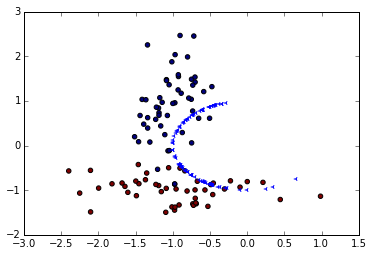

In [16]:
#Soft Margin Non-Separable dataset
svm(typ='soft',rand_state=1025,c=9999999999999)

In [10]:
#SVM Kernel and Polynomial Kernel Implementations.
#Just the calculation og XXt would change here from the previous case. rest would remain the same.
#Defining the shape of Gram matrix.
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1,random_state =1025)
Y1[Y1 == 0] = -1
X1 = preprocessing.normalize(X1)
gram_matrix = np.zeros(shape=(len(Y1),len(Y1)))
from math import exp

def kernel_func(X,y,std):        
        return (exp(np.linalg.norm(X-y)*(-1/(2*(std**2))))) #Gaussian Kernel Function
def calc_gram(typ):
    if typ == 'gaussian':
        for i in range(len(X1)):
                comp = X1[i]
                for j in range(len(X1)):       
                    comp1 = X1[j]
                    gram_matrix[i][j] =  kernel_func(comp,comp1,3.0)
    else:
        for i in range(len(gram_matrix)):
            for j in range(len(gram_matrix[i])):
                gram_matrix[i][j] = pow((gram_matrix[i][j] + 1),10)
    return gram_matrix

In [17]:
def svm_kernel(typ,gram_matrix):
    X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1,random_state =1025)
    X1 = preprocessing.normalize(X1)
    Y1[Y1 == 0] = -1
    y = Y1.reshape(len(Y1),1)
    y_t = np.transpose(y)
    yyt = np.outer(y,y_t)
    X_t = np.transpose(X1)
    #gram_matrix = np.dot(X1,X_t)
    P = yyt * gram_matrix
    q = np.full((len(Y1),1),-1)
    G_ = np.zeros((len(Y1),len(Y1)))
    G1 = G_.copy()
    G2 = G_.copy()
    np.fill_diagonal(G1,-1)
    np.fill_diagonal(G2,1)
    G = np.concatenate((G1,G2))
    h1 = np.zeros((len(Y1),1))
    h2 = np.full((len(Y1),1),50) #Hard Margin
    h = np.concatenate((h1,h2))
    b = np.full((1,1),0.0)
    A = y_t
    A = A.astype(float)
    soln = solvers.qp(matrix(P,tc = 'd'),matrix(q,tc = 'd'),matrix(G,tc = 'd'),matrix(h,tc = 'd'),matrix(A,tc = 'd'),matrix(b))
    lagra_multi = np.ravel(soln['x'])
    eps = 0.000001
    #Finding indexes of the Support vectors
    idx=np.where(lagra_multi >= eps)
    
    alpha = lagra_multi[idx]
    supp_vec_y = Y1[idx]
    supp_vec_x = X1[idx]
    #Calculatio for Wo
    b = 0
    for n in range(len(supp_vec_x)):
        b += supp_vec_y[n]
        b -= np.sum(alpha * supp_vec_y * gram_matrix[idx[0][n]][idx])
    Wo =  b/len(supp_vec_x)
    y_pred = []
    for i in range(len(X1)):
            tot = 0
            for j in range(len(supp_vec_x)):
                tot += alpha[j]*supp_vec_y[j]*gram_matrix[j][i]
            y_pred.append(int(np.sign(tot + Wo)))
    if typ=='poly':
        print "Accuracy for Polynomial Kernel Function is %f"%(accuracy(Y1,y_pred))
    else:
        print "Accuracy for Gaussian Kernel Function is %f"%(accuracy(Y1,y_pred))
    X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1,random_state =1025 )
    #Plotting Support vectors.
    plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1)
    plt.scatter(supp_vec_x[:, 0], supp_vec_x[:, 1], marker = '3')
    plt.show()
    

     pcost       dcost       gap    pres   dres
 0:  1.2371e+04 -4.0340e+04  5e+04  3e-14  3e-14
 1:  2.1384e+03 -5.2603e+03  7e+03  8e-14  3e-14
 2:  1.4300e+02 -1.3409e+03  1e+03  5e-14  2e-14
 3: -2.2826e+02 -6.1496e+02  4e+02  2e-14  2e-14
 4: -3.0838e+02 -3.8668e+02  8e+01  2e-14  2e-14
 5: -3.2490e+02 -3.6693e+02  4e+01  4e-14  3e-14
 6: -3.2998e+02 -3.3990e+02  1e+01  5e-14  3e-14
 7: -3.3144e+02 -3.3463e+02  3e+00  9e-14  3e-14
 8: -3.3195e+02 -3.3355e+02  2e+00  5e-14  3e-14
 9: -3.3225e+02 -3.3242e+02  2e-01  1e-14  3e-14
10: -3.3232e+02 -3.3233e+02  1e-02  4e-15  3e-14
11: -3.3233e+02 -3.3233e+02  5e-04  5e-14  3e-14
12: -3.3233e+02 -3.3233e+02  3e-05  3e-14  3e-14
Optimal solution found.
Accuracy for Gaussian Kernel Function is 0.900000


/root/anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:294: FutureWarning: in the future, full((100, 1), 50) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


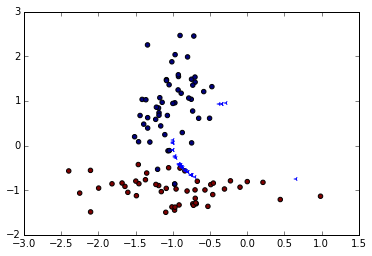

In [18]:
gram_matrix = calc_gram('gaussian')
svm_kernel(typ='gaussian',gram_matrix=gram_matrix)

     pcost       dcost       gap    pres   dres
 0:  5.7053e+02 -9.9451e+03  2e+04  3e-02  7e-12
 1:  2.0303e+02 -7.9706e+02  1e+03  2e-03  7e-12
 2:  3.4493e+01 -1.2043e+02  2e+02  1e-04  7e-12
 3: -5.6245e+00 -2.4780e+01  2e+01  3e-07  5e-12
 4: -1.1575e+01 -1.3970e+01  2e+00  1e-09  4e-12
 5: -1.2253e+01 -1.2619e+01  4e-01  8e-11  4e-12
 6: -1.2356e+01 -1.2405e+01  5e-02  3e-12  4e-12
 7: -1.2372e+01 -1.2380e+01  8e-03  7e-14  4e-12
 8: -1.2375e+01 -1.2376e+01  2e-03  7e-15  4e-12
 9: -1.2375e+01 -1.2376e+01  1e-03  3e-15  4e-12
10: -1.2375e+01 -1.2375e+01  1e-04  4e-15  4e-12
11: -1.2375e+01 -1.2375e+01  2e-05  5e-15  4e-12
12: -1.2375e+01 -1.2375e+01  3e-06  6e-15  4e-12
Optimal solution found.
Accuracy for Polynomial Kernel Function is 1.000000


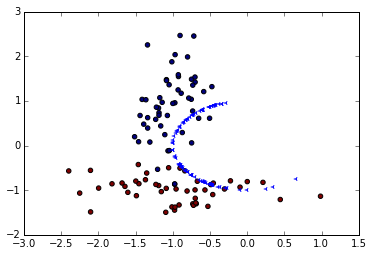

In [19]:
gram_matrix = calc_gram('poly')
svm_kernel(typ='poly',gram_matrix=gram_matrix)